<a href="https://colab.research.google.com/github/asheta66/Data-Mining/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mirichoi0218_insurance_path = kagglehub.dataset_download('mirichoi0218/insurance')

print('Data source import complete.')


Data source import complete.


## Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Readig Data

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Understand the Data

In [ ]:
# Number of rows and columns
df.shape

(1338, 7)

In [ ]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
* Sex
* Smoker
* Reigon

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## EDA

In [ ]:
# Statistical Measures of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


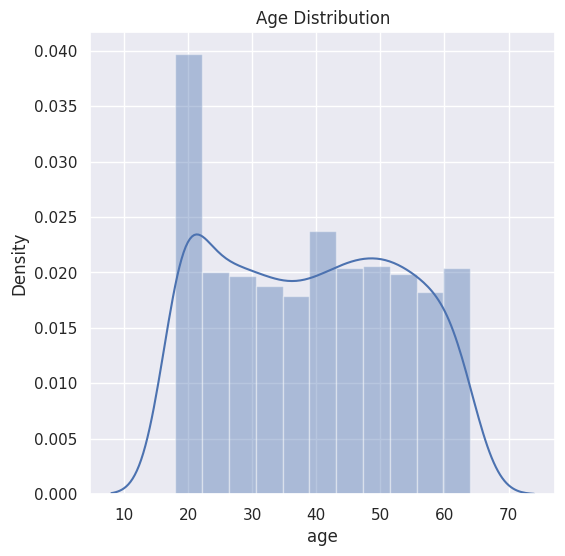

In [ ]:
# Destribution of age value
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

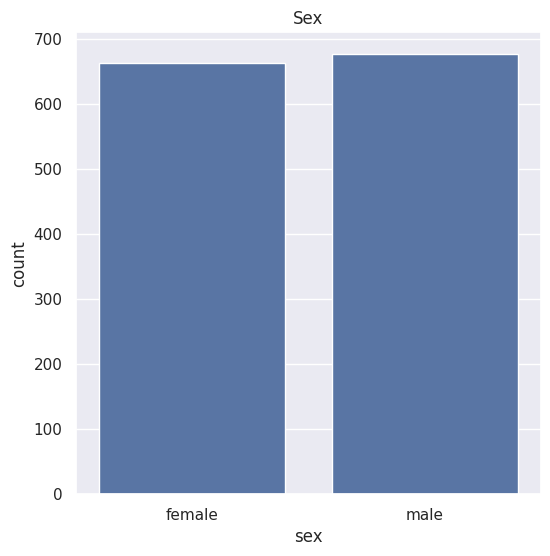

In [ ]:
# Gender Column
plt.figure(figsize= (6,6))
sns.countplot(x= 'sex', data= df)
plt.title('Sex')
plt.show()

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


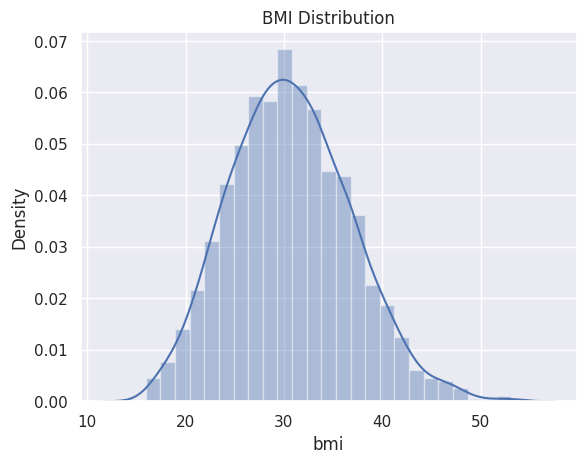

In [ ]:
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

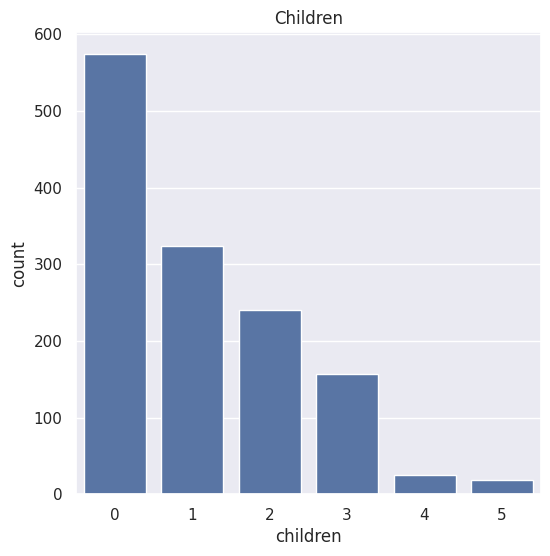

In [ ]:
# Children Column
plt.figure(figsize= (6,6))
sns.countplot(x= 'children', data= df)
plt.title('Children')
plt.show()

In [ ]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


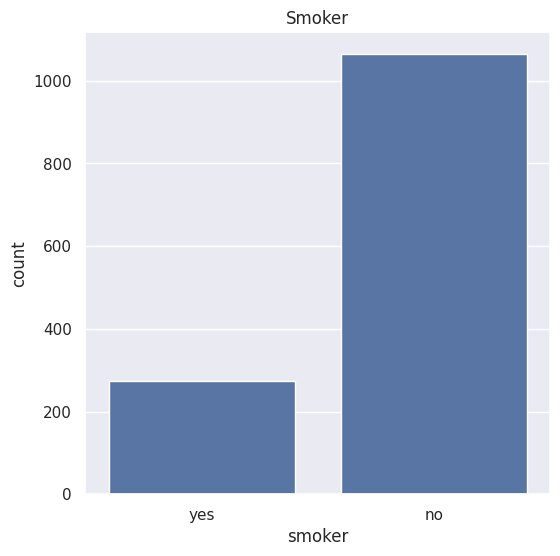

In [ ]:
# Smoker Column
plt.figure(figsize= (6,6))
sns.countplot(x= 'smoker', data= df)
plt.title('Smoker')
plt.show()

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


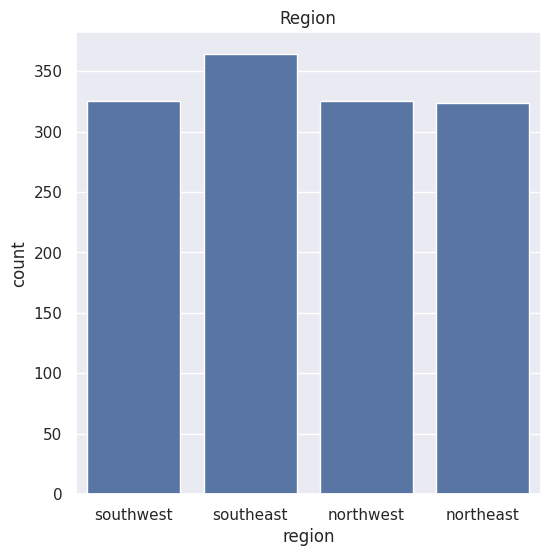

In [ ]:
# Reigon Column
plt.figure(figsize= (6,6))
sns.countplot(x= 'region', data= df)
plt.title('Region')
plt.show()

In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


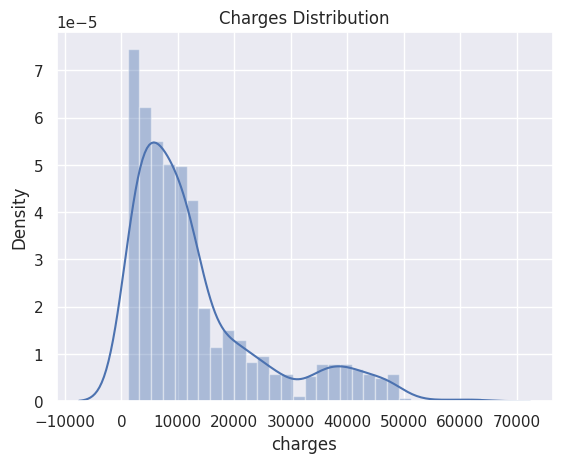

In [ ]:
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

### Encoding the catogerical features

In [ ]:
# Encoding sex column
df.replace({'sex':{'male':0, 'female':1}},inplace= True)

# Encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}},inplace= True)

# Encoding smoker column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace= True)

### Spliting the Features and Target

In [ ]:
x = df.drop(columns= 'charges',axis=1)
y= df['charges']

In [ ]:
x # Features

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [ ]:
y # Target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### Splitting the data into Training Data & Testing Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size= 0.2, random_state=2)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1338, 6)
(1070, 6)
(268, 6)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1338,)
(1070,)
(268,)


## Model Training

### Loading the linear regression model

In [ ]:
 regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

### Prediction on training data

In [ ]:
train_data_prediction = regressor.predict(x_train)

### R Squared Value

In [ ]:
r2_train = metrics.r2_score(y_train,train_data_prediction )
print("R2 Value: ",r2_train)

R2 Value:  0.751505643411174


### Prediction on testing data

In [ ]:
test_data_prediction = regressor.predict(x_test)

### R Squared Value

In [ ]:
r2_train = metrics.r2_score(y_test,test_data_prediction )
print("R2 Value: ",r2_train)

R2 Value:  0.7447273869684076


## Build a predictive system

In [ ]:
input_data=(31,1,25.74,0,1,0) # 1->female 1->no 0->southeast

# Changing input_data to a numpy array
input_data_as_numpay_array= np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpay_array.reshape(1,-1)

# Prediction
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057
